In [14]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [15]:
# Questn 1
# Random number generator
def rand_lcg(seed_rand, a_rand, m_rand, no_rand_numbs,low_b,high_b):
    random_nums = []
    x_rand = seed_rand
    for i in range(no_rand_numbs):
        x_rand = (a_rand * x_rand) % m_rand
        random_nums.append(x_rand / m_rand)                              # Noramlize the value between (0,1).
        random_nums[i] =   (random_nums[i]*((high_b - low_b)) + low_b)   # Give random values between (a,b).
    return random_nums

In [16]:
# Questn1(i)
seed_value = 42  # Initial seed value
num_random_numbers = 10     # Number of random numbers to produce
rand_low,rand_high = 0,1    # Random numbers between [rand_low,rand_high]
a_i = 65
m_i = 1021

# Questn1(ii)
seed_value = 42  # Initial seed value
num_random_numbers = 10     # Number of random numbers to produce
rand_low,rand_high = 0,1    # Random numbers between [rand_low,rand_high]
a_ii = 572
m_ii = 16381


In [17]:
random_numbers_b = rand_lcg(seed_value, a_i, m_i, num_random_numbers,rand_low,rand_high)
random_numbers_b = rand_lcg(seed_value, a_ii, m_ii, num_random_numbers,rand_low,rand_high)
print("Random numbers with a,m = 65,1021:\n",random_numbers_b,"\n")   
print("Random numbers with a,m = 572, 16381:\n",random_numbers_b)   

Random numbers with a,m = 65,1021:
 [0.4665771320432208, 0.8821195287223003, 0.5723704291557292, 0.39588547707710153, 0.4464928881020695, 0.39393199438373727, 0.32910078749771077, 0.24565044869055613, 0.5120566509981076, 0.8964043709175264] 

Random numbers with a,m = 572, 16381:
 [0.4665771320432208, 0.8821195287223003, 0.5723704291557292, 0.39588547707710153, 0.4464928881020695, 0.39393199438373727, 0.32910078749771077, 0.24565044869055613, 0.5120566509981076, 0.8964043709175264]


In [18]:
# Quest2
def function_mc_int(x):
    return np.cos(x)

def monte_carlo_integral(N,low_b,high_b,a_rand = 572,m_rand = 16381,  num_random_numbers = 0):
    num_random_numbers = N
    # Generate N random points in the interval [-pi/2, pi/2]
    z_mc_in = ((N + a_rand)%m_rand)
    
    
    rand_points_mc = np.array(rand_lcg(z_mc_in, a_rand, m_rand, N,low_b,high_b)) # Using the defined pRNG here.
    
    # Evaluate the function cos(x) at each random point
    function_values = function_mc_int(rand_points_mc)
    
    # Compute the integral approximation
    integral_approximation = np.mean(function_values) * np.pi
    
    return integral_approximation

In [19]:
# Input (2)
N_values = np.arange(1000, 100001, 1000)

The integral value is: 2.00077 (upto 5th decimal place)


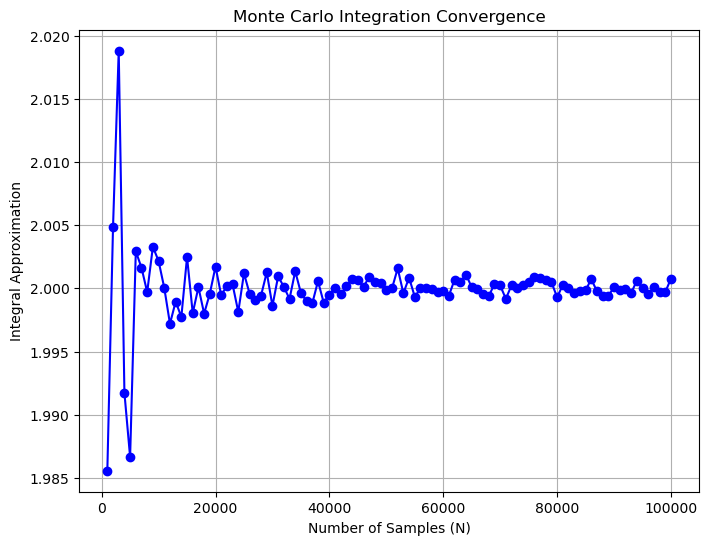

In [20]:
# Output (2):
# Compute integral approximations for each N
integral_results = [monte_carlo_integral(N,-np.pi/2,np.pi/2) for N in N_values]
print(f"The integral value is: {integral_results[-1]:.5f} (upto 5th decimal place)")
# Plot the convergence
plt.figure(figsize=(8, 6))
plt.plot(N_values, integral_results, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Samples (N)")
plt.ylabel("Integral Approximation")
plt.title("Monte Carlo Integration Convergence")
plt.grid(True)
plt.show()

In [42]:
# Quest 3
def rand_ac_rej(N):
    # Inverse Transform Method
    U = np.random.uniform(0, 1, N)
    X_inverse = -np.log(1 - U) / 2
    plt.hist(X_inverse, bins=30, density=True, alpha=0.5, label='accept/reject for exp(-2x) (0<x<3)')

    # Accept/Reject Method
    X_accept_reject = []
    while len(X_accept_reject) < N:
        U1, U2 = np.random.uniform(0, 1, 2)
        X = U1
        Y = U2 * (2 - U1)
        if Y <= 2*np.exp(-2 * X)/(2-X):
            X_accept_reject.append(X)
    X_accept_reject = np.array(X_accept_reject)
    plt.hist(X_accept_reject, bins=30, density=True, alpha=0.5, label='Inverse Transform for 2 - x (0<x<1) ')

    # Theoretical distribution
    x = np.linspace(0, 3, 1000)
    y = 2 * np.exp(-2 * x)
    plt.plot(x, y, 'r', label='Theoretical (exp(-2x))')

    plt.legend()
    plt.show()

In [43]:
# Number of random numbers to generate (Input)
N_rand = 5000

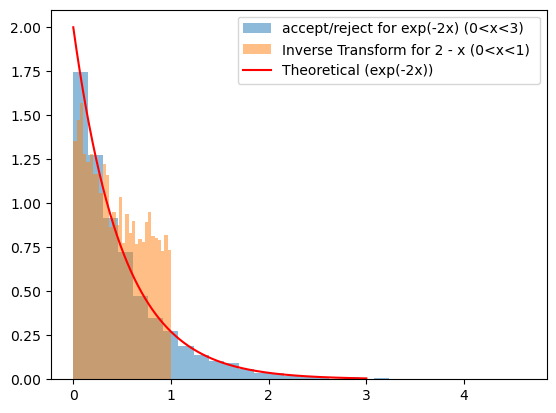

In [44]:
# Output
rand_ac_rej(N_rand)

In [24]:
# Quesnt 4
def inv_cdfp1(x):
    return 2*x
    
def inv_cdfp2(x):
    x_new = []
    for i in range(len(x)):
        x_new.append(-math.log(1 - x[i]/2) )
    x_new = np.array(x_new)
    return x_new

def inv_cdfp3(x):
    x_new = []
    for i in range(len(x)):
        x_new.append(-2*np.log(1-x[i]*(1 - np.exp(-0.5))))
    x_new = np.array(x_new)
    return x_new


def function_mc_int_pdf(x):
    return math.exp(-2*x)/(1+x**(2))

def integration_pdf(p,seed_value_int,num_random_numbers_int,rand_low_int,rand_high_int):
    x_rand_pdf= p(rand_lcg(seed_value_int, 572, 16381, num_random_numbers_int,rand_low_int,rand_high_int))
    funct_value_i = []
    for i in range(num_random_numbers_int):
        funct_value_i.append(function_mc_int_pdf(x_rand_pdf[i]))
    funct_value_i = np.array(funct_value_i)
    integral_approximation = np.mean(funct_value_i) * (rand_high_int - rand_low_int )
    return integral_approximation

In [25]:
# Input (4):
seed_value_int = 42  # Initial seed value
num_random_numbers_int = 10000    # Number of random numbers to produce
rand_low_int,rand_high_int = 0,2    # Random numbers between [rand_low,rand_high]

In [26]:
# Output (4):
print(integration_pdf(inv_cdfp1,seed_value_int,num_random_numbers_int,rand_low_int,rand_high_int))
print(integration_pdf(inv_cdfp2,seed_value_int,num_random_numbers_int,rand_low_int,rand_high_int))
print(integration_pdf(inv_cdfp3,seed_value_int,num_random_numbers_int,rand_low_int,rand_high_int))

0.3985843876716382
0.5858458219170337
0.430042038384266


It was observed that the uniform distribution gives better convergence, and hence, also gives lower variance in the samples. While, P2(x) and P3(x)  is not that great, as random number between 0 and 2 are much larger than 1 the value of exp(-2x)/(1+x**(2)) between 0 and 2. Thus, we see larger variances with respect to uniform distribution.